# Audio features

> Audio features

In [ ]:
#| default_exp audio.features

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

In [ ]:
#| export

import torchaudio
import torch.nn as nn

from matplotlib import pyplot as plt

from omegaconf import OmegaConf
from hydra.utils import instantiate

from typing import Any, Callable, List, Optional, Tuple, Union, Iterator, Dict

# from nimrod.audio.utils import plot_waveform

## Mel Spectrogram

In [ ]:
#| export

class MelSpecgram(nn.Module):
    """MelSpecgram

    use torchaudio mel computation and add clamping & scaling to mimic taco2

    """
    def __init__(self,
        sampling_rate:int=22050,
        win_length:int=1024,
        hop_length:int=256,
        n_fft:int=1024,
        f_min:float=0.0,
        f_max:float=8000.0,
        n_mels:int=80,
        power:float=1.0,
        mel_scale:str='slaney',
        normalized:bool=True,
        _target_=None
        ):
        """Constructor

        Args:
            sampling_rate (int, optional): _description_. Defaults to 22050.
            win_length (int, optional): _description_. Defaults to 1024.
            hop_length (int, optional): _description_. Defaults to 256.
            n_fft (int, optional): _description_. Defaults to 1024.
            f_min (float, optional): _description_. Defaults to 0.0.
            f_max (float, optional): _description_. Defaults to 8000.0.
            n_mels (int, optional): _description_. Defaults to 80.
            power (float, optional): _description_. Defaults to 1.0.
            mel_scale (str, optional): _description_. Defaults to 'slaney'.
            normalized (bool, optional): _description_. Defaults to True.
        """
        super().__init__()
        self.sampling_rate = sampling_rate
        self.win_length = win_length
        self.hop_length = hop_length
        self.n_fft = n_fft
        self.f_min = f_min
        self.f_max= f_max
        self.n_mels = n_mels
        self.power = power
        self.mel_scale = mel_scale
        self.normalized = normalized
        self.mel_spectrogram = torchaudio.transforms.MelSpectrogram(
            sample_rate=sampling_rate,
            win_length=win_length,
            hop_length=hop_length,
            n_fft=n_fft,
            f_min=f_min,
            f_max=f_max,
            n_mels=n_mels,
            power=power,
            mel_scale=mel_scale,
            normalized=normalized
        )
        self.mels = None

    def forward(self, audio):
        # (C, N_mels, T)
        # with dynamic range compression
        self.mels = self.mel_spectrogram(audio) \
                .clamp_(min=1e-5) \
                .log_()
        return self.mels

    def plot(self):
        if torch.is_tensor(self.mels):
            plt.title("Mel spectrogram")
            plt.xlabel('Time frames')
            plt.ylabel("Mel bins")
            plt.imshow(self.mels.squeeze(0), origin='lower')


### Usage

In [ ]:
cfg = OmegaConf.load("../config/data/audio/features/mel_spectrogram.yaml")
cfg.sampling_rate = 16000
print(type(cfg), cfg)
wav, sr = torchaudio.load("../data/audio/obama.wav")
print(wav.shape,sr)

<class 'omegaconf.dictconfig.DictConfig'> {'_target_': 'nimrod.audio.features.MelSpecgram', 'sampling_rate': 16000, 'n_fft': 1024, 'hop_length': 256, 'win_length': 1024, 'n_mels': 80, 'f_min': 0.0, 'f_max': 8000.0}
torch.Size([1, 102400]) 16000


In [ ]:
mel_spectrogramer = MelSpecgram(**cfg)
# mel_spectrogramer = instantiate(cfg)
print(mel_spectrogramer)
mels = mel_spectrogramer(wav)
print(mels.shape)

MelSpecgram(
  (mel_spectrogram): MelSpectrogram(
    (spectrogram): Spectrogram()
    (mel_scale): MelScale()
  )
)
torch.Size([1, 80, 401])


<matplotlib.image.AxesImage>

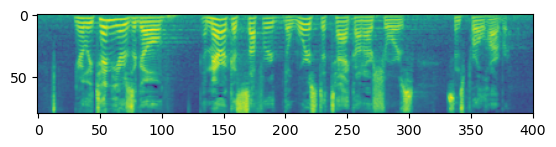

In [ ]:
plt.imshow(mels.squeeze(0))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()